In [2]:
import os 
os.getcwd()

'C:\\Users\\harsh'

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter

In [8]:
os.chdir('E:\Data Analysis\Python&ML')

In [9]:
os.getcwd()

'E:\\Data Analysis\\Python&ML'

In [14]:
df = pd.read_csv('Sales Data.csv')

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.shape

(11251, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [18]:
df.drop(['Status','unnamed1'],axis=1,inplace= True)

In [19]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
df.dropna(inplace= True)

In [22]:
df['Amount'] = df['Amount'].astype('int')

In [23]:
df['Amount'].dtypes

dtype('int32')

In [32]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Gender

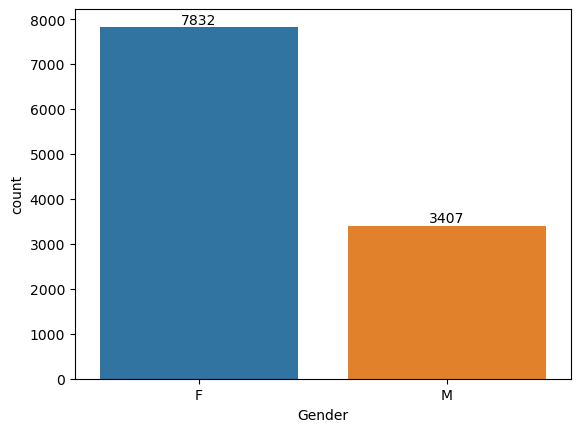

In [46]:
ax = sns.countplot(x='Gender', data = df)
ax.bar_label(ax.containers[0]);

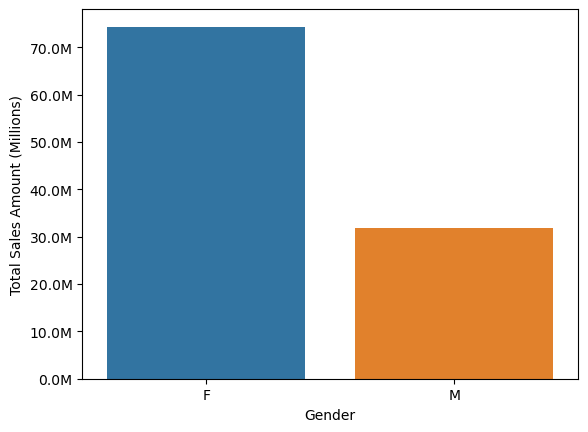

In [83]:
sales_gen = df.groupby(['Gender'])['Amount'].sum().reset_index()
ax = sns.barplot(x='Gender', y ='Amount', data = sales_gen)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_ylabel('Total Sales Amount (Millions)');

The above graphs suggest that most of the buyers are females with greater purchasing power than men

# Age

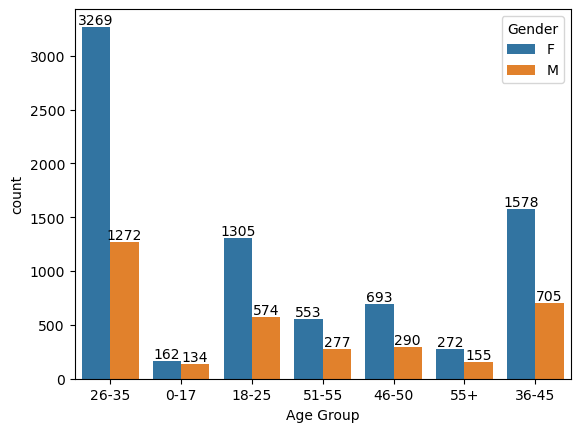

In [51]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for container in ax.containers:
    ax.bar_label(container);

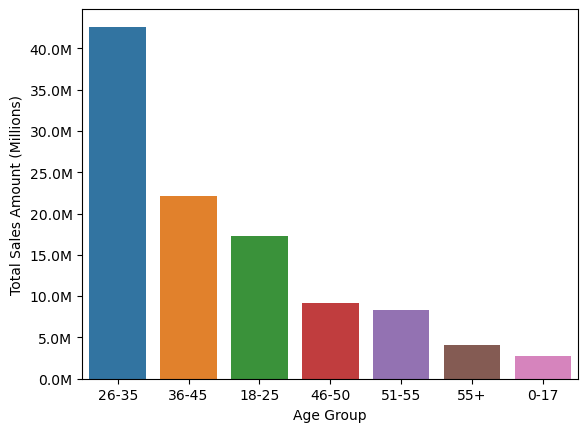

In [82]:
sales_agegroup = df.groupby(['Age Group'])['Amount'].sum().reset_index()
sales_agegroup = sales_agegroup.sort_values(by='Amount', ascending=False)
ax = sns.barplot(x='Age Group', y = 'Amount', data = sales_agegroup)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_ylabel('Total Sales Amount (Millions)');

Above graphs suggest that most of the buyers are from 26-35 age group

# State

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

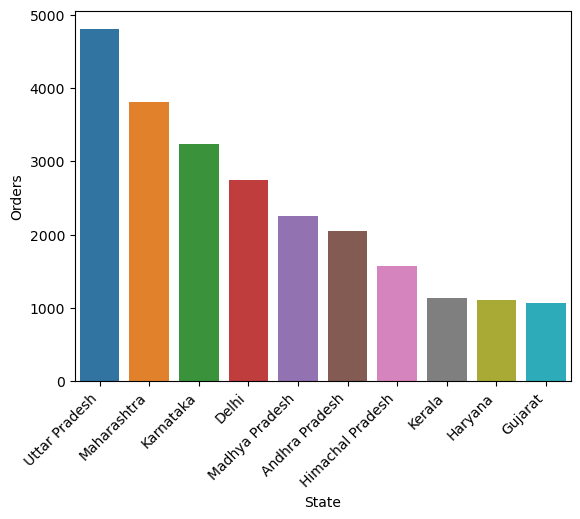

In [73]:
state_sales = df.groupby(['State'])['Orders'].sum().reset_index()
state_sales = state_sales.sort_values(by = 'Orders', ascending = False).head(10)
ax = sns.barplot(x='State', y = 'Orders', data = state_sales)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

Top 10 states by Amount

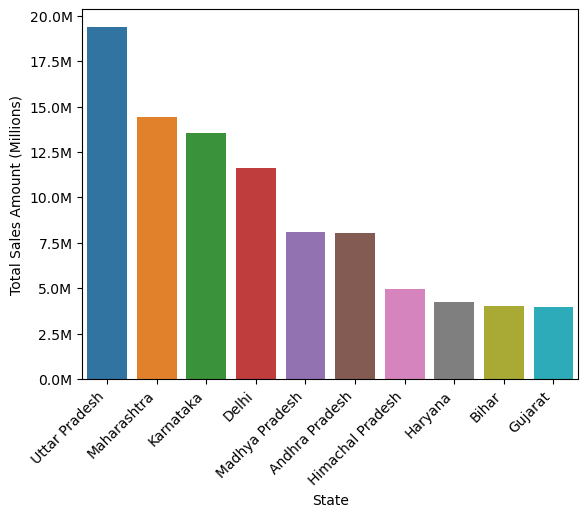

In [78]:
state_sales = df.groupby(['State'])['Amount'].sum().reset_index()
state_sales = state_sales.sort_values(by = 'Amount', ascending = False).head(10)
ax = sns.barplot(x='State', y = 'Amount', data = state_sales)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_ylabel('Total Sales Amount (Millions)');

The above graphs suggest that UP, Maharashtra and Karnataka have most orders as well as sales amount

# Marital Status

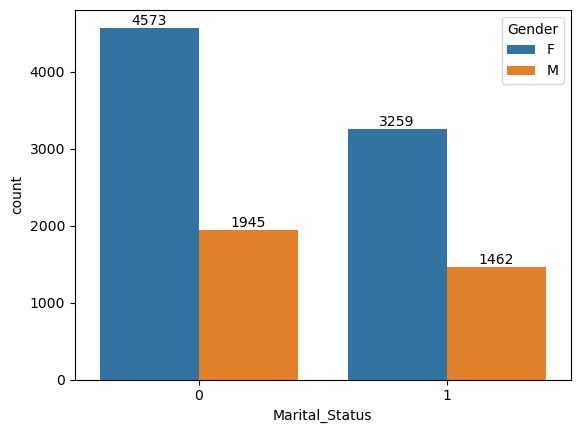

In [92]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender')
for container in ax.containers:
    ax.bar_label(container);

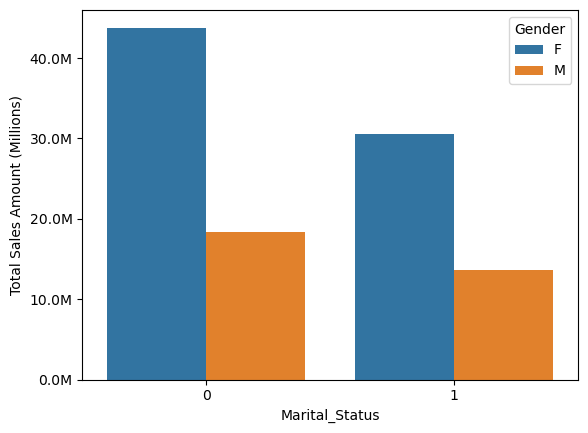

In [95]:
marital_sales = df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
marital_sales = marital_sales.sort_values(by = 'Amount', ascending = False).head(10)
ax = sns.barplot(x='Marital_Status', y = 'Amount', data = marital_sales, hue = 'Gender')
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_ylabel('Total Sales Amount (Millions)');

From the above graph we can analyse that most of the buyers are married (women) and have high purchasing power

# Occupation

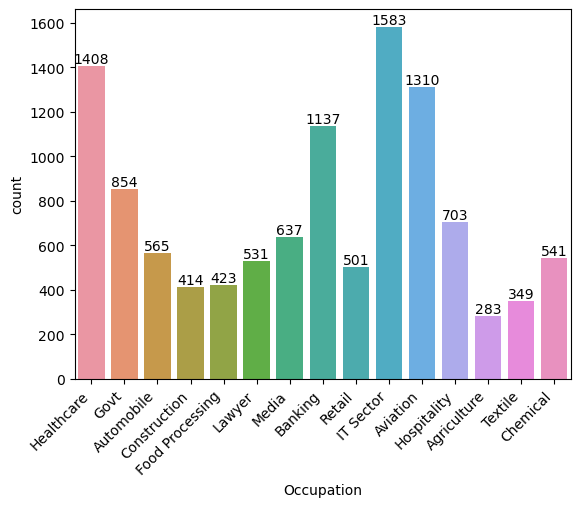

In [98]:
ax = sns.countplot(data = df, x = 'Occupation')
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

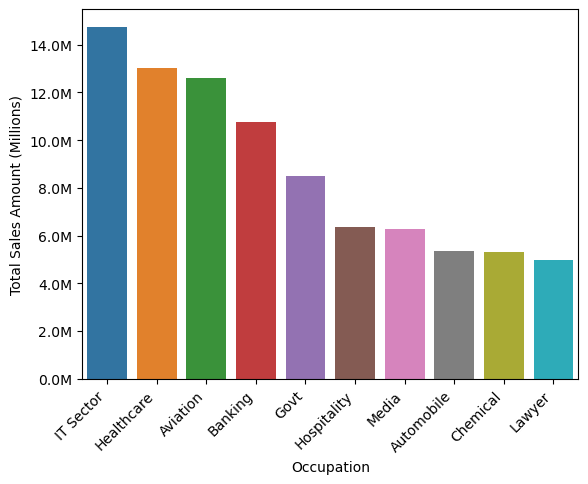

In [102]:
occupation_sales = df.groupby(['Occupation'])['Amount'].sum().reset_index()
occupation_sales = occupation_sales.sort_values(by = 'Amount', ascending = False).head(10)
ax = sns.barplot(x='Occupation', y = 'Amount', data = occupation_sales)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_ylabel('Total Sales Amount (Millions)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

Most buyers are from IT sector followed by healthcare and aviation

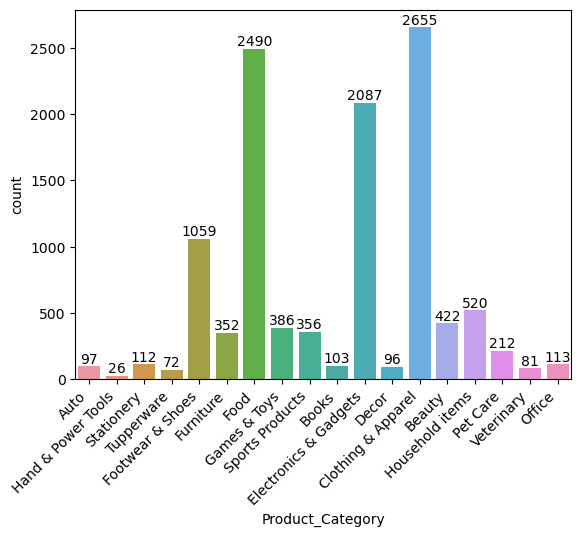

In [103]:
ax = sns.countplot(data = df, x = 'Product_Category')
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

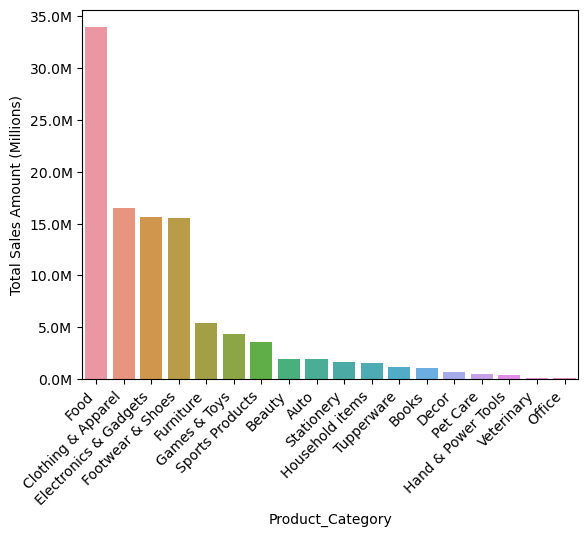

In [111]:
product_sales = df.groupby(['Product_Category'])['Amount'].sum().reset_index()
product_sales = product_sales.sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(x='Product_Category', y = 'Amount', data = product_sales)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_ylabel('Total Sales Amount (Millions)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

Most amount spend in Food, followed by Clothing and Electronics

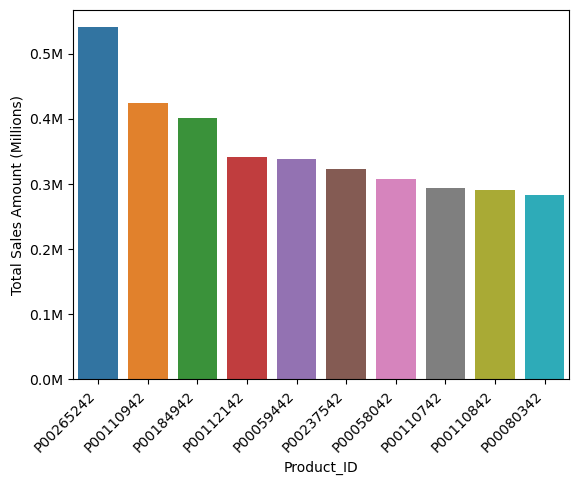

In [115]:
productID_sales = df.groupby(['Product_ID'])['Amount'].sum().reset_index()
productID_sales = productID_sales.sort_values(by = 'Amount', ascending = False).head(10)
ax = sns.barplot(x='Product_ID', y = 'Amount', data = productID_sales)
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'
ax.yaxis.set_major_formatter(FuncFormatter(millions))
ax.set_ylabel('Total Sales Amount (Millions)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

Product with ID: P00265242 brings the most sales amount for the company